In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="root",
    database="sprint"
)
query = """
    SELECT *
    FROM companies
"""

query2 = """
    SELECT *
    FROM transactions
"""
query3 = """
    SELECT *
    FROM credit_cards
"""
query4 = """
    SELECT *
    FROM users
"""
query5 = """
    SELECT *
    FROM products
"""
df_comp = pd.read_sql(query, con=mydb)
df_comp.head

df_trans = pd.read_sql(query2, con=mydb)
df_trans.head

df_users = pd.read_sql(query4, con=mydb)
df_trans.head

D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\237835383.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_comp = pd.read_sql(query, con=mydb)
D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\237835383.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)
D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\237835383.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_users = pd.read_sql(query4, con=mydb)


<bound method NDFrame.head of                                        id   card_id business_id  \
0    108B1D1D-5B23-A76C-55EF-C568E49A05DD  CcU-2938      b-2222   
1    7DC26247-20EC-53FE-E555-B6C2E55CA5D5  CcU-2945      b-2226   
2    72997E96-DC2C-A4D7-7C24-66C302F8AE5A  CcU-2952      b-2230   
3    AB069F53-965E-A2A8-CE06-CA8C4FD92501  CcU-2959      b-2234   
4    2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5  CcU-2966      b-2238   
..                                    ...       ...         ...   
582  C1DCC32D-E42A-F2D6-17AD-FF4A639A9B5A  CcU-3512      b-2550   
583  5C3A8A3D-8974-40A6-A8AF-C1F7AA6B7C94  CcU-3519      b-2554   
584  D6EB93C6-5733-84C8-FDD6-57BA4136E528  CcU-3526      b-2558   
585  A4D0D84F-4622-BB83-E6B6-51E545D4A217  CcU-3533      b-2562   
586  9FBB3D61-D3C2-E5BB-4BC3-6CC83C718D34  CcU-3540      b-2566   

              timestamp  amount  declined     product_ids  user_id       lat  \
0   2021-07-07 17:43:16  293.57         0              59      275  83.78390   
1   2

C:\Users\amigu\AppData\Local\Temp\ipykernel_14808\1500318629.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


<Axes: xlabel='amount', ylabel='Density'>

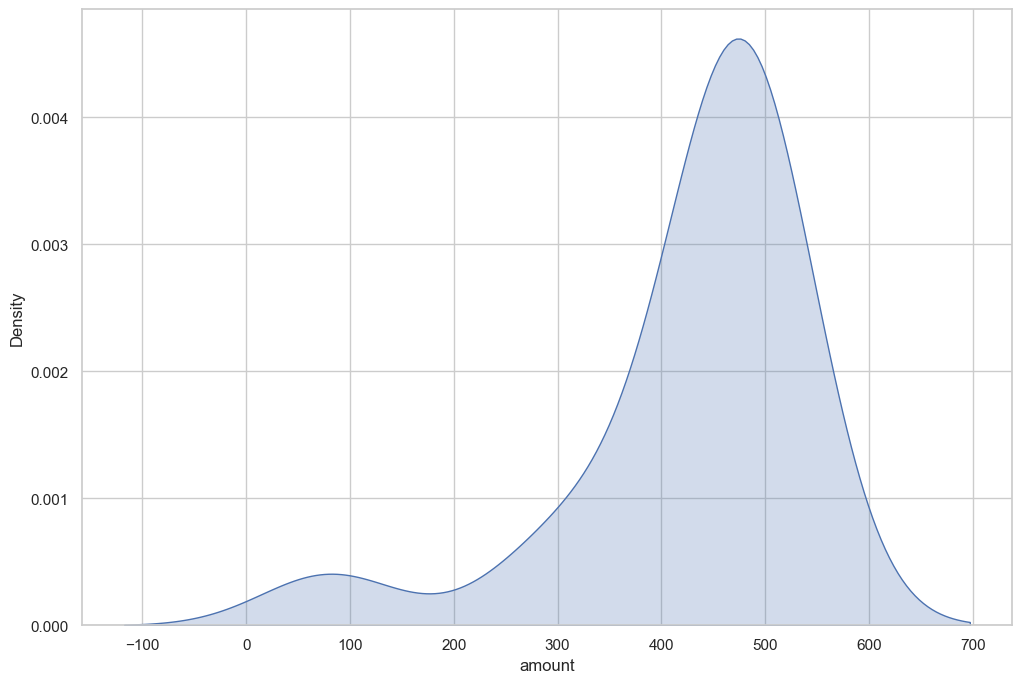

In [6]:
#ej 1 variable numerica
import sqlalchemy as sa
df_trans = pd.read_sql(query2, con=mydb)
resulte1 = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")
dresulte1 = resulte1.groupby("country").max("amount")
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.kdeplot(dresulte1,x="amount", fill=True)

C:\Users\amigu\AppData\Local\Temp\ipykernel_25572\2668330255.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2 = pd.read_sql(query2, con=mydb)


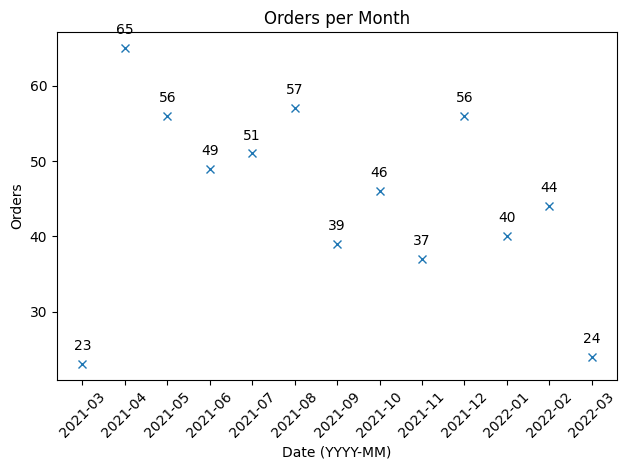

In [16]:
#2 variables numericas

q2 = pd.read_sql(query2, con=mydb)

# Close the database connection
mydb.close()

# Convert the timestamp column to datetime format
q2['timestamp'] = pd.to_datetime(q2['timestamp'])

# Extract year and month from the timestamp
q2['year_month'] = q2['timestamp'].dt.to_period('M')

# Aggregate data: count orders per year_month
agg_df = q2.groupby('year_month').size().reset_index(name='orders')

# Convert year_month back to string for plotting
agg_df['year_month'] = agg_df['year_month'].astype(str)


plt.plot(agg_df['year_month'], agg_df['orders'], linestyle='none', marker='x')
for i in range(len(agg_df)):
    plt.annotate(
        agg_df['orders'][i],
        (agg_df['year_month'][i], agg_df['orders'][i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Orders')
plt.title('Orders per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


C:\Users\amigu\AppData\Local\Temp\ipykernel_25572\4194238957.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2 = pd.read_sql(query2, con=mydb)


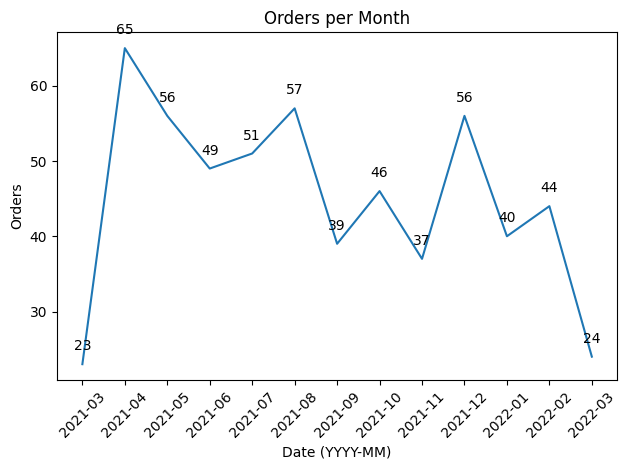

In [15]:
import mysql.connector
#2 variables numericas (2.0)


mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="root",
    database="sprint"
)

query2 = """
    SELECT *
    FROM transactions
"""
q2 = pd.read_sql(query2, con=mydb)

# Convert the timestamp column to datetime format
q2['timestamp'] = pd.to_datetime(q2['timestamp'])

# Extract year and month from the timestamp
q2['year_month'] = q2['timestamp'].dt.to_period('M')

# Aggregate data: count orders per year_month
agg_df = q2.groupby('year_month').size().reset_index(name='orders')

# Convert year_month back to string for plotting
agg_df['year_month'] = agg_df['year_month'].astype(str)

df=pd.DataFrame({'xvalues': agg_df['year_month'], 'yvalues': agg_df["orders"] })
 
# plot
plt.plot( 'xvalues', 'yvalues', data=df)

for i in range(len(agg_df)):
    plt.annotate(
        agg_df['orders'][i],
        (agg_df['year_month'][i], agg_df['orders'][i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Orders')
plt.title('Orders per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

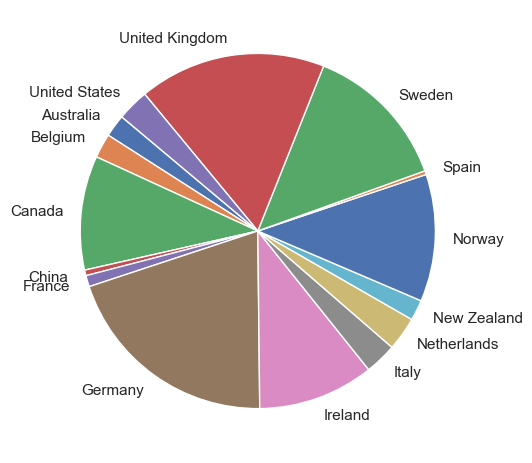

In [4]:
#ej 1 variable categorica
a=resulte1.groupby("country").size()
a1=resulte1.groupby("country")
a1.groups.keys()
a1l=list(a1.groups)
plt.pie(a, labels=a1l, startangle=140)
plt.tight_layout()
plt.show()

C:\Users\amigu\AppData\Local\Temp\ipykernel_24492\3513538783.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_comp = pd.read_sql(query, con=mydb)
C:\Users\amigu\AppData\Local\Temp\ipykernel_24492\3513538783.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


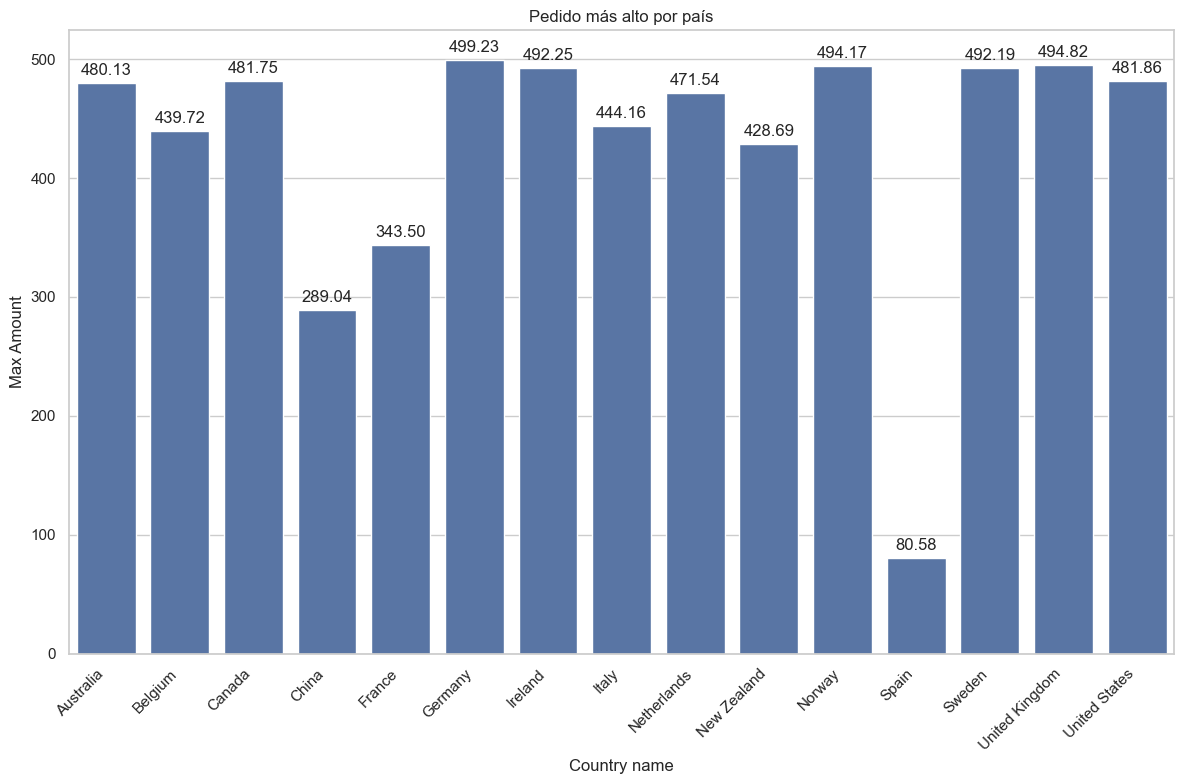

In [2]:
#ej  variable numerica y categorica

df_comp = pd.read_sql(query, con=mydb)
df_trans = pd.read_sql(query2, con=mydb)
resulte1 = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")
dresulte1 = resulte1.groupby("country").max("amount")



plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
barplot = sns.barplot(x="country", y="amount",data = dresulte1)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # Offset text by 9 points vertically
                     textcoords = 'offset points')
plt.xlabel("Country name")
plt.ylabel("Max Amount")
plt.title("Pedido más alto por país")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


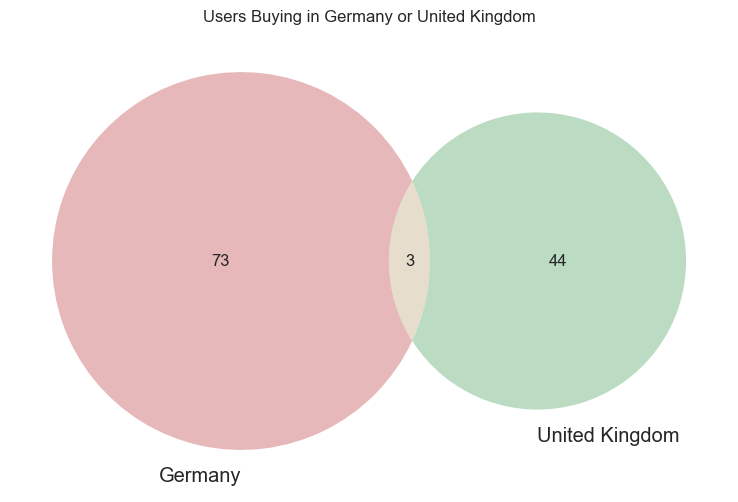

In [19]:
# dos variables categoricas
from matplotlib_venn import venn2
resulte1 = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")



users_germany = set(resulte1[resulte1['country'] == 'Germany']['user_id'])
users_uk = set(resulte1[resulte1['country'] == 'United Kingdom']['user_id'])

# Plot the Venn diagram
plt.figure(figsize=(10, 6))
venn2([users_germany, users_uk], ('Germany', 'United Kingdom'))
plt.title('Users Buying in Germany or United Kingdom')
plt.show()

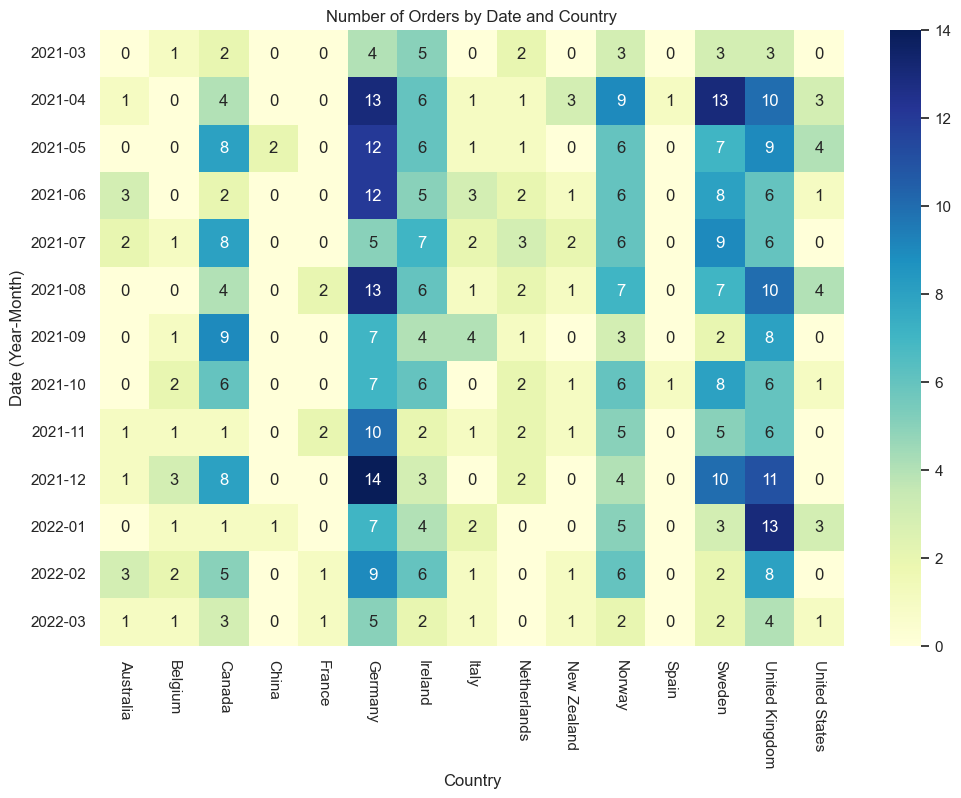

In [20]:
#3 variables
resulte1 = pd.merge(df_trans, df_comp, left_on = "business_id", right_on = "company_id", how="inner")
# Convert the timestamp column to datetime
resulte1['timestamp'] = pd.to_datetime(resulte1['timestamp'])

# Extract the date (year-month) for aggregation
resulte1['year_month'] = resulte1['timestamp'].dt.to_period('M')

# Aggregate the data by year_month and country to count orders
heatmap_data = resulte1.groupby(['year_month', 'country']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Orders by Date and Country')
plt.xlabel('Country')
plt.ylabel('Date (Year-Month)')
plt.xticks(rotation=-90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()


D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_12992\1176880043.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_qp = pd.read_sql(query2, con=mydb)


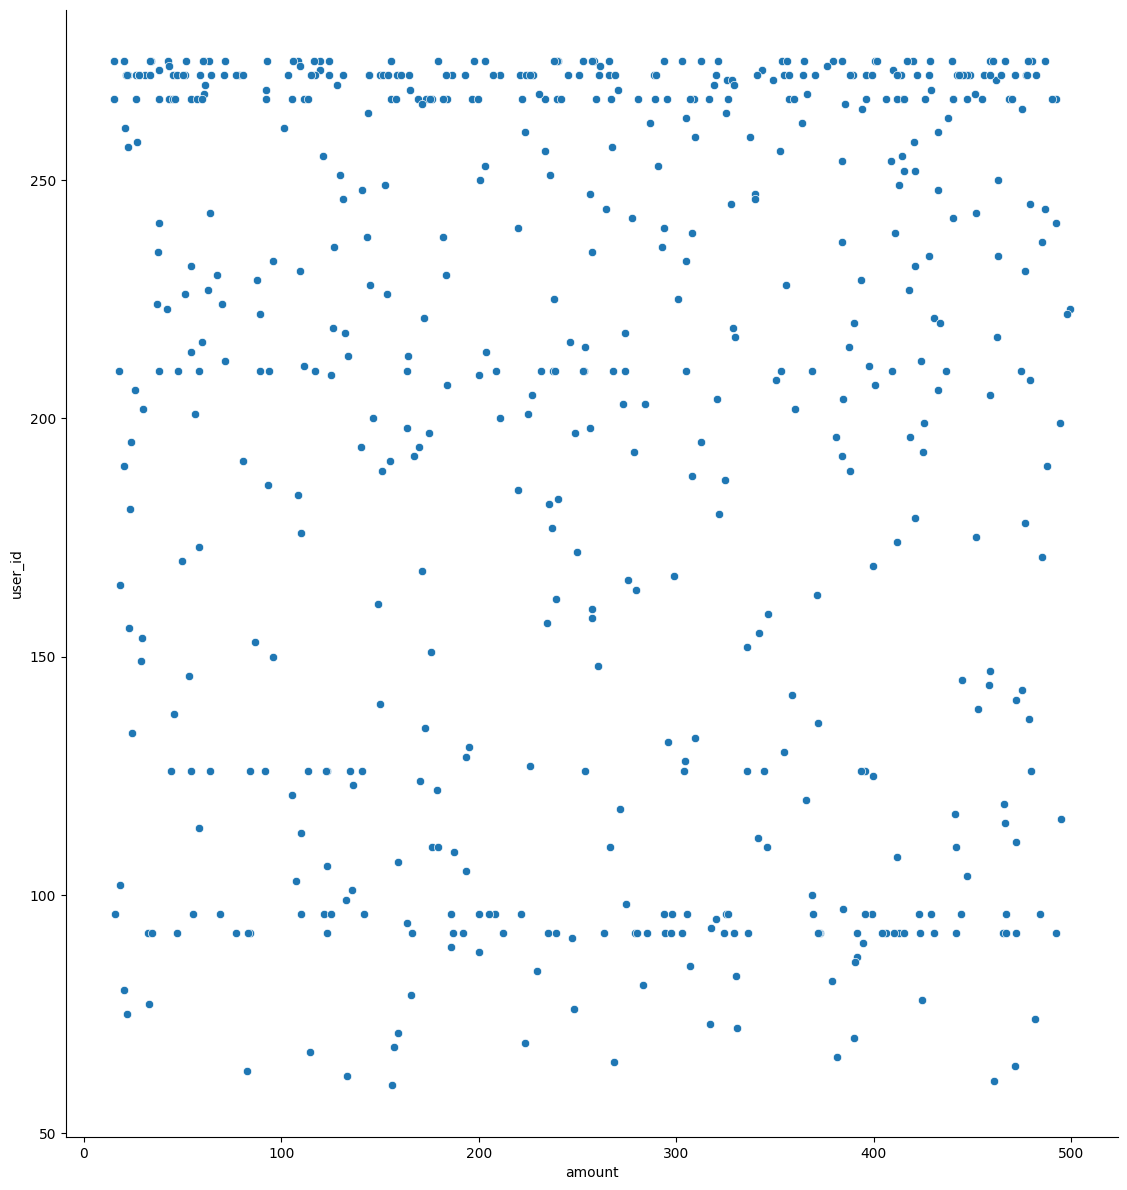

In [11]:
#nivel 1, graficar pairplot
df_qp = pd.read_sql(query2, con=mydb)

gra = sns.pairplot(df_qp,
    x_vars=["amount"],
    y_vars=["user_id"])
gra.fig.set_size_inches(15,15)

In [16]:
#nivel 2, correlacion variables numericas
df_c = pd.read_sql(query2, con=mydb)

        
df_c.corr(numeric_only=True)



D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\4066685453.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_c = pd.read_sql(query2, con=mydb)


,amount,declined,user_id,lat,longitude
amount,1.000000,-0.037882,-0.035354,0.078116,0.043439
declined,-0.037882,1.000000,0.414293,0.010402,-0.002523
user_id,-0.035354,0.414293,1.000000,-0.004486,0.017145
lat,0.078116,0.010402,-0.004486,1.000000,-0.006894
longitude,0.043439,-0.002523,0.017145,-0.006894,1.000000


In [20]:
df_c = pd.read_sql(query2, con=mydb)
d_matrix = pd.DataFrame(df_c, columns=['amount', 'lat', 'longitude'])
matrix = d_matrix.corr()
matrix.style.background_gradient(cmap='coolwarm', axis=None)

D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\1323706851.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_c = pd.read_sql(query2, con=mydb)


,amount,lat,longitude
amount,1.000000,0.078116,0.043439
lat,0.078116,1.000000,-0.006894
longitude,0.043439,-0.006894,1.000000


D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_18780\1003287095.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_c = pd.read_sql(query2, con=mydb)


<Axes: >

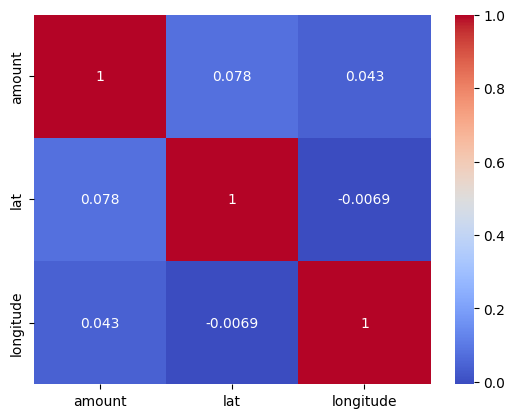

In [24]:
df_c = pd.read_sql(query2, con=mydb)
d_matrix = pd.DataFrame(df_c, columns=['amount', 'lat', 'longitude'])
matrix = d_matrix.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm")

D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_12992\4073064569.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pair = pd.read_sql(query2, con=mydb)


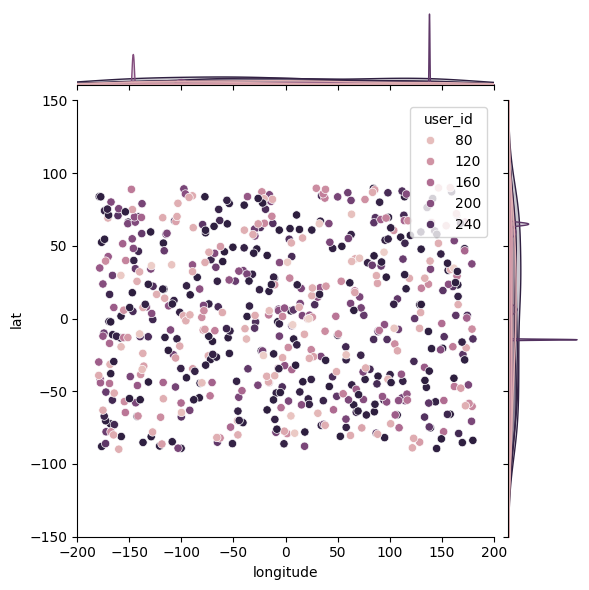

In [14]:
#nivel 2, jointplot
df_pair = pd.read_sql(query2, con=mydb)


ad=sns.jointplot(df_pair, x="longitude", y="lat", hue="user_id",xlim=(-200, 200), ylim=(-150, 150))

C:\Users\amigu\AppData\Local\Temp\ipykernel_14808\431213741.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pair = pd.read_sql(query2, con=mydb)


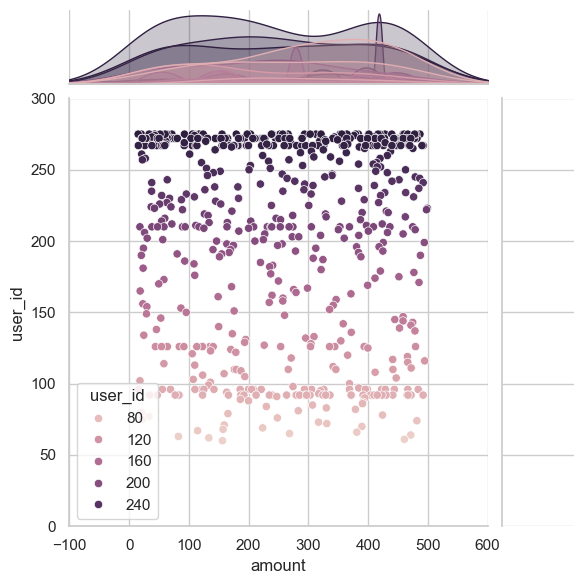

In [8]:
df_pair = pd.read_sql(query2, con=mydb)


ad=sns.jointplot(df_pair, x="amount", y="user_id", hue="user_id",xlim=(-100, 600), ylim=(0, 300))

D:\users\ciberconnecta_11\AppData\Local\Temp\ipykernel_5012\4016078039.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql(query2, con=mydb)


<Axes: >

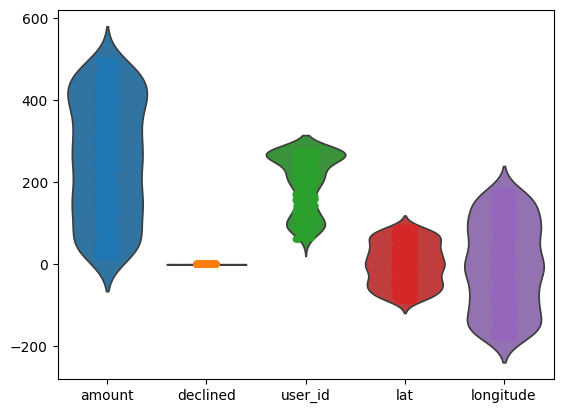

In [4]:
#nivel 3, violinplot
df_trans = pd.read_sql(query2, con=mydb)

sns.violinplot(df_trans)
sns.stripplot(df_trans)


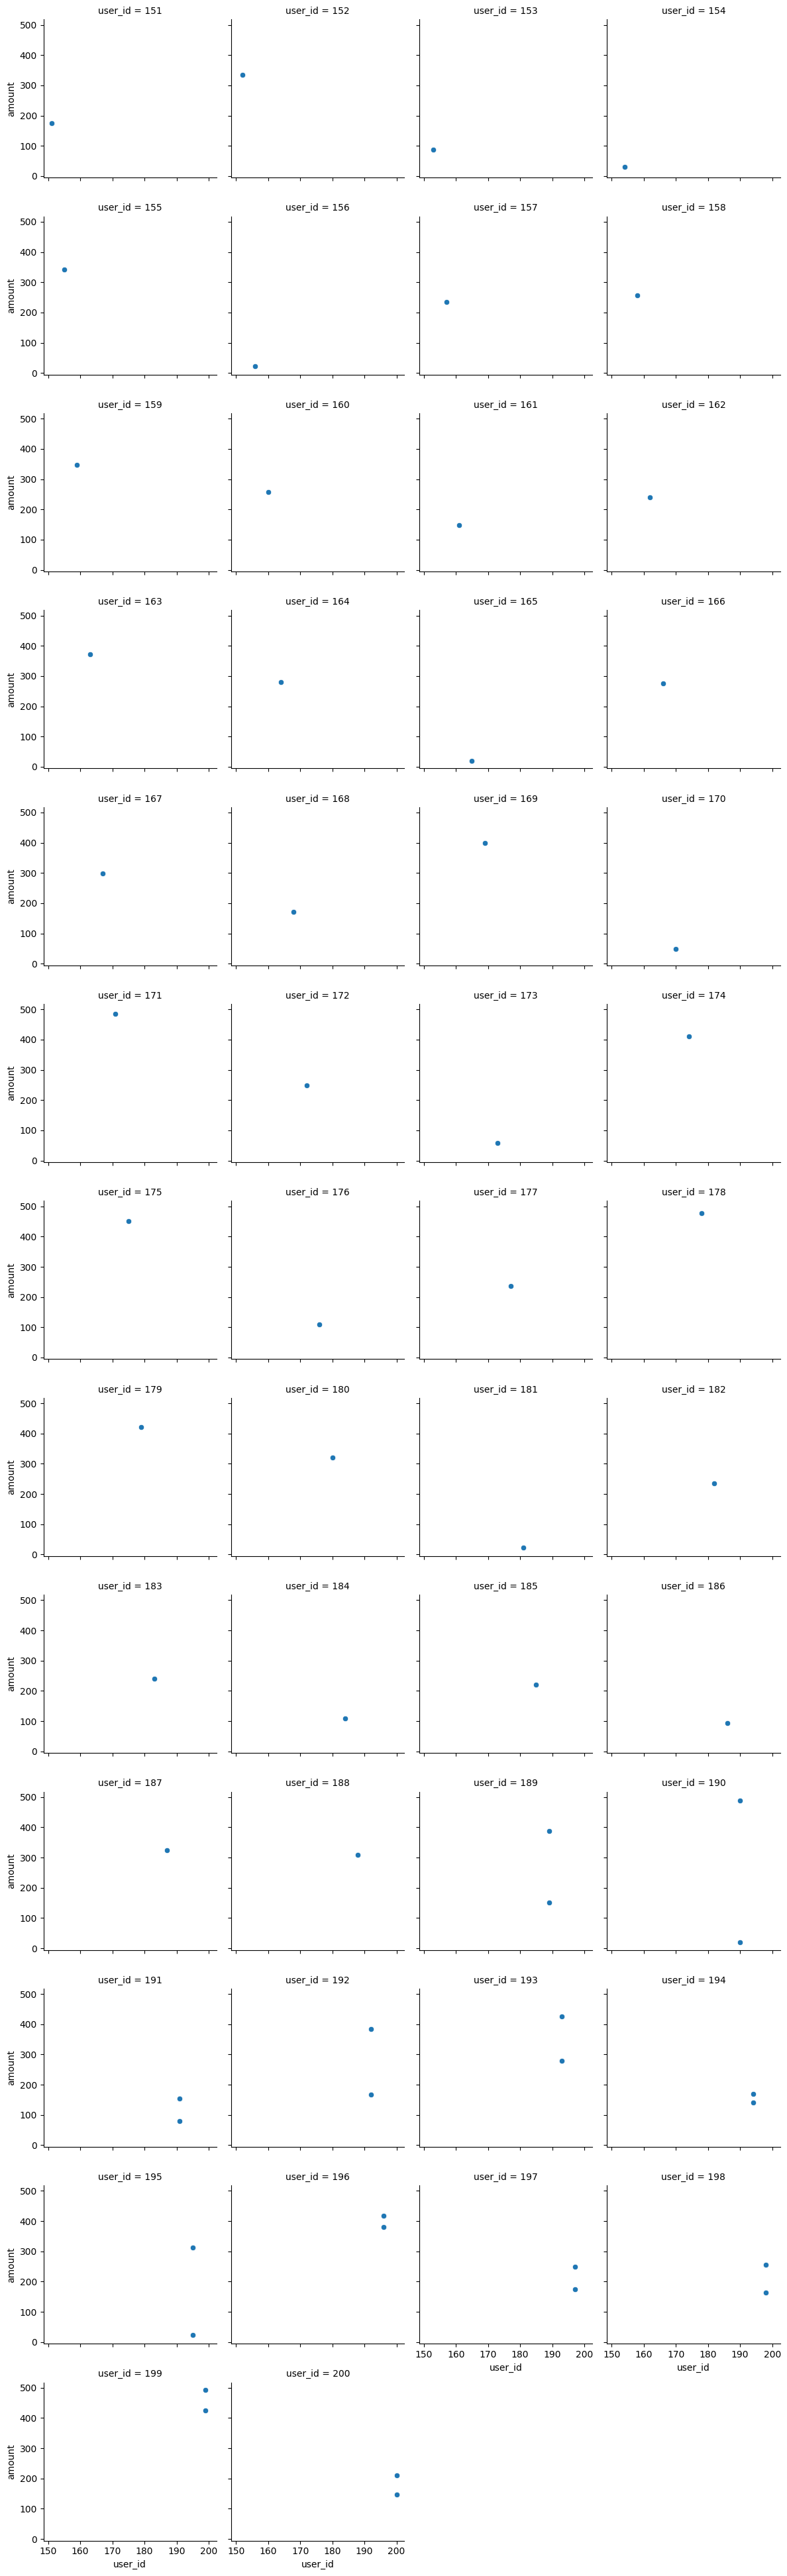

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_trans, df_comp, and df_users are already defined

# Merge dataframes

l3m = pd.merge(df_trans, df_users, left_on="user_id", right_on="id", how="inner")

# Groupby and aggregate
l3max = l3m.groupby("user_id").agg({'amount': 'max'}).reset_index()
l3min = l3m.groupby("user_id").agg({'amount': 'min'}).reset_index()

# Filter for UK users
l3_uk = l3m[l3m['country'] == 'United Kingdom']

# Plotting using FacetGrid
g = sns.FacetGrid(l3_uk, col="user_id", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="user_id", y="amount")

plt.show()